In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import *
import gym
from rl.agents import DDPGAgent
from rl.memory import SequentialMemory

In [10]:
# GymのPendulum環境を作成
env = gym.make("Pendulum-v0")

# 取りうる”打ち手”のアクション数と値の定義
nb_actions = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

print("Action Space: %s" % env.action_space)
#action  dim = 1
#critic dim = 3 with ??
print( env.observation_space.shape[0])

Action Space: Box(1,)
3


In [11]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(a_shape[0], activation="linear")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape, s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(32, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [14]:
def rlagent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = DDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        target_model_update=.01
    )
    return agent

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 59s 6ms/step - reward: -5.9595
50 episodes - episode_reward: -1191.897 [-1690.627, -640.425] - loss: 62.867 - mean_squared_error: 125.734 - mean_q: -150.582

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 63s 6ms/step - reward: -2.9468
50 episodes - episode_reward: -589.366 [-772.109, -317.760] - loss: 130.577 - mean_squared_error: 261.154 - mean_q: -229.201

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 68s 7ms/step - reward: -1.8814
50 episodes - episode_reward: -376.281 [-897.032, -8.038] - loss: 103.424 - mean_squared_error: 206.849 - mean_q: -208.767

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 74s 7ms/step - reward: -1.9889
50 episodes - episode_reward: -397.780 [-897.846, -0.068] - loss: 75.607 - mean_squared_error: 151.214 - mean_q: -176.323

Interval 5 (40000 steps

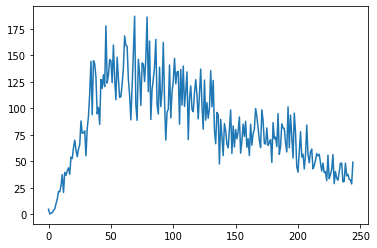

In [15]:
agent = rlagent(env.action_space.shape, env.observation_space.shape)

opt = 'adam'

if opt == 'adam':
    #adam optimizer
    agent.compile(Adam(lr=0.001, clipnorm=1., decay = 0.0001), metrics=["mse"])
elif opt == 'adadelta':
    #adadelta optimizer
    agent.compile(Adadelta(), metrics=['mse'])
elif opt == 'adagrad':
    #adagrad optimizer
    agent.compile(Adagrad(), metrics=['mse'])
else:
    assert False, 'Fuck'

agent.fit(env, nb_steps=50000, visualize=0, verbose=1, nb_max_episode_steps=200, loss_graph=True)
#agent.test(env, nb_episodes=5, visualize=0, nb_max_episode_steps=200)

Testing for 5 episodes ...


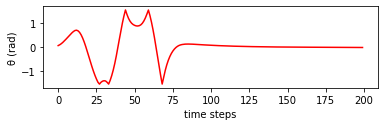

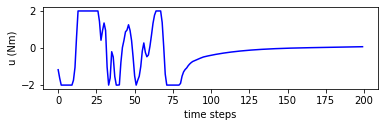

Episode 1: reward: -466.972, steps: 200


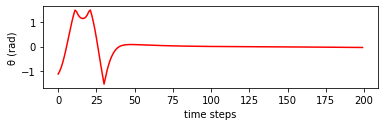

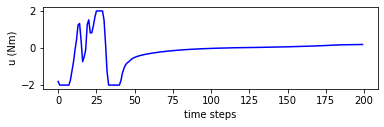

Episode 2: reward: -233.954, steps: 200


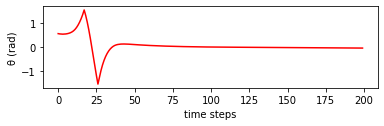

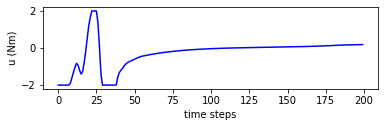

Episode 3: reward: -132.172, steps: 200


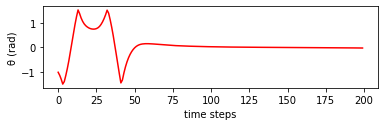

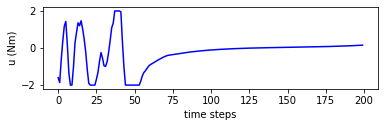

Episode 4: reward: -248.692, steps: 200


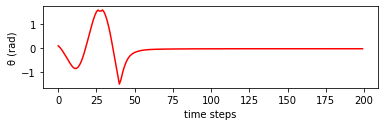

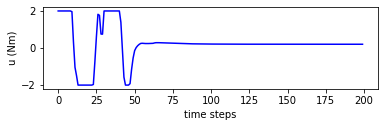

Episode 5: reward: -331.467, steps: 200


In [16]:
agent.test(env, nb_episodes=5, visualize=1, nb_max_episode_steps=200, graph=1)

Testing for 5 episodes ...


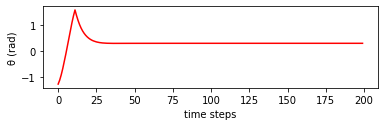

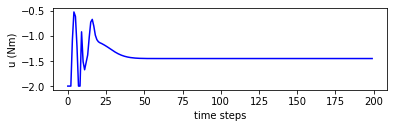

Episode 1: reward: -133.819, steps: 200


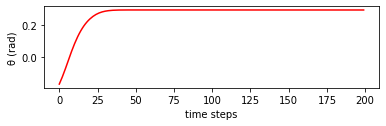

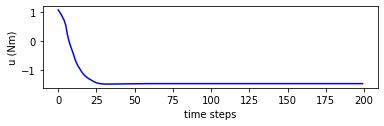

Episode 2: reward: -20.138, steps: 200


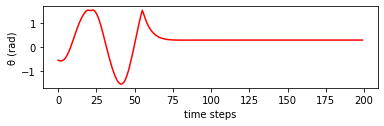

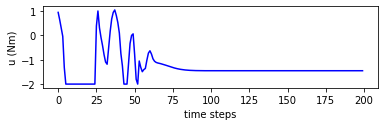

Episode 3: reward: -399.076, steps: 200


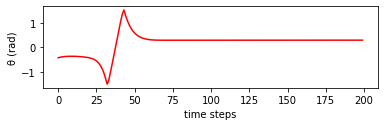

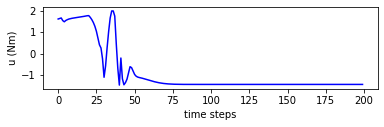

Episode 4: reward: -146.608, steps: 200


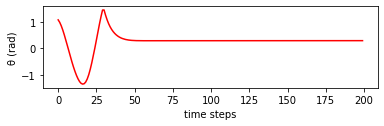

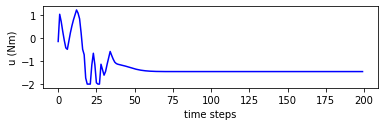

Episode 5: reward: -252.548, steps: 200


In [8]:
def rlagent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = DDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        target_model_update=.01
    )
    return agent

agent =  rlagent((1,), env.observation_space.shape)
agent.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])
agent.load_weights('./testview.h5')
agent.test(env, nb_episodes=5, visualize=1, nb_max_episode_steps=200, graph=1)

In [ ]:
agent.fit(env, nb_steps=30000, visualize=1, verbose=1, nb_max_episode_steps=200)

In [12]:
agent.save_weights('testview.h5')